> 1. > # HyperParameter
***DRL for stock trading*:**
Deep Reinforcement Learning for Automated Stock Trading
Using reinforcement learning to trade multiple stocks through Python and OpenAI Gym

In [ ]:
#from google.colab import drive ; drive.mount('/content/drive')

In [ ]:
!pip install gym keras keras-rl2 tensorflow==2.1

In [ ]:
from numpy import loadtxt
import os
#os.chdir("/content/drive/MyDrive") 


#data = loadtxt('2010_2021.csv', delimiter=',' , encoding='utf-16') 
data = loadtxt('US30_from2021.csv', delimiter=',' , encoding='utf-16')
prices = data[:,1]
dates = data[:,0]
dates = dates.astype(int)
len(prices)

105869

# Reloud AI

In [ ]:

import pandas as pd 
from datetime import datetime as dt
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from datetime import datetime
from numpy import savetxt
import random ; from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten 
from tensorflow.keras.optimizers import Adam
from rl.policy import * ; from rl.memory import * ; from rl.agents import *

In [ ]:
#input_shape=(Memoryin_window_length,ob_space_Length,window)
Memoryin_window_length      = 1
window                      = 360
ob_space_Length             = 5
actions                     = 3
MemoryLimit                 = 600000
#----------------------------------------------------------- 
fee                         = 3.0
SL                          = 25.0
TP                          = 25.0
#------------------------------------------------------------
Time_each_trade             = 60

#------------------------------------------------------------
steps = 1000
Looping = 2
sIndex                        = 4000
eIndex                        = 3200000    # MAX = 3.490.000 [ 290.000 Traning 200 Evalation]


In [ ]:
360/8

45.0

In [ ]:
def GrapheV15(stats):
    plt.figure(figsize=(16, 9)) 
    x = stats[:,0]
    y = np.arange(0,len(x) ) 
    plt.plot(  y ,   x   , label="US30 Line" )
    plt.plot(  y ,  stats[:,1]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,2]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,3]    , label="US30 Line" )
    plt.plot(  y ,  stats[:,4]    , label="US30 Line" )
    plt.show()
def GrapheV16(price):
    plt.figure(figsize=(16, 9)) 
    x = price
    y = np.arange(0,len(x) ) 
    plt.plot(  y ,   x   , label="US30 Line" )
    plt.show()    
def showV409(nb):
  x = []
  y = []
  p = 0
  s = 0
  for i in range(0, len(env.R)  ):
    for j in range( 0 , len(env.R[i])   ):
      s = s + env.R[i][j]
      if ( env.R[i][j] != 0 ):
        x.append(s)
        y.append(p)
        p = p + 1
  k = nb
  l = 0
  print( ' All Rewards : {} \n'.format(  x[ len(x)-1 ]  ) )
  for i in range(0,k):
    m = int (len(x)/k )
    x1 = x[ l:(m + m*i) ]
    y1 = y[ l:(m + m*i) ]
    plt.figure(figsize=(16, 9))
    plt.plot( y1, x1, label="US30 Line") 
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Line Graph Example")
    plt.show()  # 200
    l = (m + m*i)    
def ShowReward(nb,AllReward):
  x = []
  y = []
  p = 0
  s = 0
  for i in range(0, len(AllReward)  ):
    if ( AllReward[i] != 0 ):
      s+=AllReward[i]
      x.append(s)
      y.append(p)
      p = p + 1
  k = nb
  l = 0
  if(len(x)>2):
    print( ' All Rewards : {} \n'.format(  x[ len(x)-1 ]  ) )
  for i in range(0,k):
    m = int (len(x)/k )
    x1 = x[ l:(m + m*i) ]
    y1 = y[ l:(m + m*i) ]
    plt.figure(figsize=(16, 9))
    plt.plot( y1, x1, label="US30 Line") 
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Line Graph Example")
    plt.show()  # 200
    l = (m + m*i)         

In [ ]:
def build_model(ob_space_Length, window, actions,Memoryin_window_length):
    model = Sequential()
    model.add(Dense(128,activation='relu', input_shape=(Memoryin_window_length,ob_space_Length,window) ) )
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions))
    return model    
def build_agent(model, actions,Memoryin_window_length):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit= MemoryLimit , window_length=Memoryin_window_length)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000 ,
                   gamma=0.95 
                  )
    return dqn  
model = build_model(ob_space_Length, window, actions,Memoryin_window_length)
model.summary()
dqn = build_agent(model, actions,Memoryin_window_length)
dqn.compile( Adam(lr=1e-4))    
#name  = 'WSaved/17-36-20/17-36-20.h5f'
#dqn.load_weights(name)    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 5, 128)         46208     
_________________________________________________________________
dense_1 (Dense)              (None, 1, 5, 256)         33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 5, 256)         65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1, 5, 128)         32896     
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1923      
Total params: 179,843
Trainable params: 1

In [ ]:
def isShort( indexStart ):
  global prices , TP , SL , fee
  res = -1
  index = 1 #min + random.randint(0, 3)
  min = indexStart
  max = min+ 4000
  for i in range(min,max):
    if( prices[i] <= (prices[min]-TP) ):
      res = TP - fee
      index = i - min  
      break
    if( prices[i] >= (prices[min]+SL) ):
      res = -SL 
      index = i - min    
      break
  if( res == -1 ):
    print("XLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLX")  
    res = -SL -fee
    index = max - min
  return [res , index]
def isLong( indexStart ):
  global prices , TP , SL , fee
  res = -1
  index = 1 #min + random.randint(1, 3)
  min = indexStart
  max = min+ 4000
  for i in range(min,max):
    if( prices[i] >= (prices[min]+TP) ):
      res = TP - fee
      index = i - min   
      break
    if( prices[i] <= (prices[min]-SL) ):
      res = -SL 
      index = i - min   
      break
  if( res == -1 ):
    print("XLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLX")  
    res = -SL -fee
    index = max - min
  return [res , index]  

In [ ]:
def SMAOLD(Data,Periodes):
    n = len(Data)-1 
    res = [Data[0]]
    for i in range(0,n):
      iSMA = 0
      for j in range(i,i+Periodes):
        if(j>=n):
          iSMA = iSMA +Data[n]
        else:
          iSMA = iSMA + Data[j]
      iSMA = iSMA/Periodes  
      res.append(iSMA)
    return res 
def getStats(price_):
  res  = []
  sma5 =  SMAOLD( price_, 5  )
  sma10 = SMAOLD( price_, 10 )
  sma20 = SMAOLD( price_, 20 )
  sma50 = SMAOLD( price_, 50 )
  for i in range(0,len(price_)):
    res.append( [ price_[i] ,sma5[i],sma10[i],sma20[i],sma50[i]  ] )
  res     = np.array(res)  
  #ma = res.max()
  #mi = res.min()
  ma = price_[0]+1000
  mi = price_[0]-1000
  #print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>{} '.format(ma-mi ) )
  res = ( res - mi )/(ma - mi) 
  #print( ' ~~~~~~~~~~~~~~~ Max = {} _ Min = {} '.format(res.max(),  res.min() ) )
  return res

Testing for 100 episodes ...
---------------> 738 <--------------
Episode 1: reward: 22.000, steps: 1
---------------> 1119 <--------------
Episode 2: reward: 0.010, steps: 1
---------------> 1498 <--------------
Episode 3: reward: 22.000, steps: 1
---------------> 1878 <--------------
Episode 4: reward: 0.010, steps: 1
---------------> 2260 <--------------
Episode 5: reward: 0.010, steps: 1
---------------> 2630 <--------------
Episode 6: reward: 22.000, steps: 1
---------------> 3017 <--------------
Episode 7: reward: 0.010, steps: 1
---------------> 3394 <--------------
Episode 8: reward: 22.000, steps: 1
---------------> 3757 <--------------
Episode 9: reward: 22.000, steps: 1
---------------> 4136 <--------------
Episode 10: reward: 0.010, steps: 1
---------------> 4517 <--------------
Episode 11: reward: -25.000, steps: 1
---------------> 4890 <--------------
Episode 12: reward: 0.010, steps: 1
---------------> 5282 <--------------
Episode 13: reward: 22.000, steps: 1
-----------

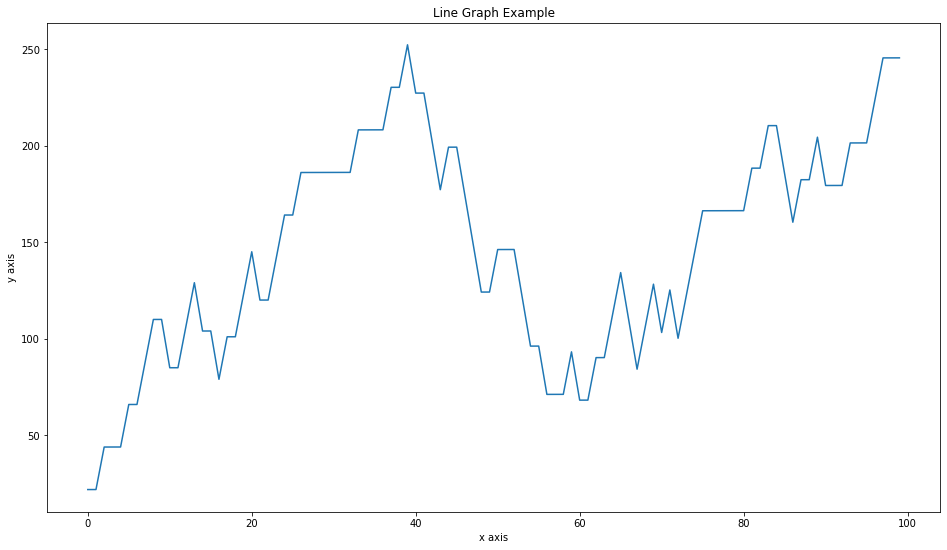

In [ ]:
class env1(Env ):
    def __init__(self,  prices  ,tp_,sl_, ifTesting):
         #------------  observation_space  observation_space --------------------------------------------
        global ob_space_Length , window  , fee , sIndex , eIndex , Time_each_trade , AllReward
        self.window = window   # 360Min = 6H (Best View) 
        self.prices = prices
        self.observation_space = Box(low= 0.0, high= 1.0, shape=( ob_space_Length ,self.window), dtype=np.float64 )
        self.action_space = Discrete(3)
 
        #------------  Parameters --------------------------------------------
        self.DayStep =  360 #1380
        self.startIndex = sIndex
        self.iwin = 0               # iWindow [ 0 - (length_data - window ) ]
        self.SL = sl_
        self.TP = tp_
        self.ifTesting = ifTesting
        self.Time_each_trade = Time_each_trade

 
 
    def step(self, action):
        reward = 0
        
        iaccPrice = self.startIndex  + self.iwin
        
        accPrice = self.prices[iaccPrice]
        newprice = 0
        
        if(action==0):# sell
          reward , index = isShort( iaccPrice  )

          
        
        if(action==1):# Buy
          reward , index = isLong( iaccPrice  )

           
        if(action==2):# none
          reward = 0.01
 
        self.iwin = self.iwin + self.Time_each_trade  # 60 1H
        
        # Check if shower is done
        if self.iwin > ( len(self.DayStats)  ) :
            done = True
           
           
        else:
            done = False
            i1 = self.iwin - self.window
            i2 = self.iwin
            self.state = np.transpose( self.DayStats[i1:i2] )
            #print( '--->{}  '.format( self.iwin  ) )
            
            
        info_ = {}
        AllReward.append( reward )
        return self.state, reward, done, info_
 
    def render(self):
       r=0
         
    def reset(self):
        self.iwin = self.window
        self.startIndex += self.DayStep + random.randint(0, 50) 
        d1 = self.startIndex
        d2 = d1 + self.DayStep 
        self.DayStats  = getStats( prices[d1:d2] )
        
        i1 = self.iwin - self.window
        i2 = self.iwin
        
        self.state = np.transpose( self.DayStats[i1:i2]  )
        #print('---------------> {} <--------------'.format( d2 ))
        if( d2 > eIndex  ):
          self.startIndex = sIndex + random.randint(0, 50) 

        return self.state
#-----------------------------------------------------------------
AllReward = []
sIndex                        = 0
eIndex                        = 500000
env = env1(    prices , TP, SL,1)
_ = dqn.test(env, nb_episodes=100  , visualize=False)

ShowReward(1,AllReward)


In [ ]:
 #ShowReward(4,AllReward)

In [ ]:
AllReward = []
sIndex                        = 3300000
eIndex                        = 3400000
env = env1(prices , TP, SL,1)
_ = dqn.test(env, nb_episodes=10  , visualize=False)
 
ShowReward(1,AllReward)


Testing for 10 episodes ...


IndexError: ignored

In [ ]:
100000/60/23/20

3.6231884057971016

In [ ]:
#  hjgh
sIndex                        = 0
eIndex                        = 50000
env = env1(    prices , TP, SL,0)
FileVersion = "K/Aminev250/"
time = datetime.now()
time = time.strftime("%H-%M-%S")
render = 0
steps = 400000
Looping = 1
NameSaving = "testing"
for i in range(0,Looping):
  dqn.fit(env, nb_steps=steps, visualize=False, verbose=2)
  time_ = datetime.now()
  time_ qqqqqq= time_.strftime("%H-%M-%S")
  NameSaving = FileVersion+time_+'/' +str(time_)+".h5f"
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII') 
  print(NameSaving)
  print('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII')
  dqn.save_weights(NameSaving, overwrite=True)

  43131/400000: episode: 43131, duration: 0.061s, episode steps:   1, steps per second:  16, episode reward: 22.000, mean reward: 22.000 [22.000, 22.000], mean action: 1.000 [1.000, 1.000],  loss: 107.937973, mean_q: 3.265139, mean_eps: 0.100000
  43132/400000: episode: 43132, duration: 0.048s, episode steps:   1, steps per second:  21, episode reward: 22.000, mean reward: 22.000 [22.000, 22.000], mean action: 1.000 [1.000, 1.000],  loss: 92.010933, mean_q: 3.389651, mean_eps: 0.100000
  43133/400000: episode: 43133, duration: 0.044s, episode steps:   1, steps per second:  23, episode reward: 22.000, mean reward: 22.000 [22.000, 22.000], mean action: 0.000 [0.000, 0.000],  loss: 80.717499, mean_q: 3.431104, mean_eps: 0.100000
  43134/400000: episode: 43134, duration: 0.047s, episode steps:   1, steps per second:  21, episode reward:  1.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 2.000 [2.000, 2.000],  loss: 105.851593, mean_q: 2.701857, mean_eps: 0.100000
  43135/400000: ep

In [ ]:
loss 200